# Revenue Analysis of Surf and Ultimate Plans – Megaline Telecom

This notebook presents an exploratory and statistical analysis of customer data from the telecom company **Megaline**, which offers two prepaid plans: **Surf** and **Ultimate**.

The objective is to understand customer behavior (calls, messages, and internet usage) and determine which plan generates more average monthly revenue. The analysis includes data cleaning, feature engineering, revenue calculations, and statistical testing to support data-driven business decisions.

## Load all libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import math
import seaborn as sns

## Load & Explore the Data

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('Datasets/megaline_calls.csv')
df_internet = pd.read_csv('Datasets/megaline_internet.csv') 
df_messages = pd.read_csv('Datasets/megaline_messages.csv')
df_plans = pd.read_csv('Datasets/megaline_plans.csv')
df_users = pd.read_csv('Datasets/megaline_users.csv')

Information about the rates DataFrame

In [3]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Don't need any modification

### Information about the users DataFrame

In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
182,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,NaN
93,1093,Karima,Hampton,69,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-12-17,surf,NaN
312,1312,Kory,Emerson,42,"Fresno, CA MSA",2018-01-26,surf,NaN
180,1180,Wonda,Hays,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-01,surf,2018-12-22
286,1286,Casie,Castaneda,52,"New Haven-Milford, CT MSA",2018-12-07,surf,NaN
222,1222,Cleo,Anderson,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-27,surf,NaN
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,NaN
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaN
419,1419,Bryon,Gordon,45,"Phoenix-Mesa-Chandler, AZ MSA",2018-03-29,surf,NaN
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaN


Need to chande de dates into datetime formar

Changes

In [7]:
df_users['reg_date']= pd.to_datetime(df_users['reg_date'])
df_users['churn_date']= pd.to_datetime(df_users['churn_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Enhance the dataset with additional features/information

In [8]:
df_users['is_active'] = df_users['churn_date'].isna()
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
57,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,NaT,True
200,1200,Delmar,Cross,45,"Boston-Cambridge-Newton, MA-NH MSA",2018-11-27,surf,NaT,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
408,1408,Alaine,Robertson,40,"Baltimore-Columbia-Towson, MD MSA",2018-01-11,surf,NaT,True
127,1127,Marchelle,Brock,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,NaT,True
238,1238,Jackeline,Byrd,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-16,surf,NaT,True
153,1153,Kathaleen,Crawford,30,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-19,surf,NaT,True
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,NaT,True
188,1188,Ethelene,Brock,31,"Richmond, VA MSA",2018-01-10,ultimate,NaT,True
371,1371,Roderick,Slater,27,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-10-27,surf,NaT,True


In [9]:
#create a new dataframe with user_id and plan
user_plan= df_users[['user_id', 'plan']]
user_plan

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


### Information about the calls DataFrame

In [10]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
df_calls.sample(10)

,id,user_id,call_date,duration
39532,1147_283,1147,2018-07-13,5.97
88577,1324_633,1324,2018-08-30,9.26
97221,1347_47,1347,2018-10-21,10.63
28169,1106_579,1106,2018-10-22,0.00
131330,1472_278,1472,2018-07-30,0.00
44148,1160_164,1160,2018-09-07,5.14
69882,1250_112,1250,2018-11-05,14.74
75976,1268_480,1268,2018-10-18,0.00
72282,1257_22,1257,2018-06-07,7.06
4736,1022_2,1022,2018-11-14,0.00


Cahnges

In [12]:
# Convert 'call_date' to datetime format
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Enhance the dataset with additional features/information

In [13]:
# Extract month from 'call_date' and create a new column
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.sample(10)

,id,user_id,call_date,duration,month
48039,1174_16,1174,2018-06-06,2.24,6
91358,1329_177,1329,2018-09-10,12.46,9
109118,1385_188,1385,2018-06-03,10.74,6
50315,1181_689,1181,2018-07-24,0.00,7
112390,1396_101,1396,2018-09-02,2.65,9
118206,1412_490,1412,2018-08-20,6.76,8
136488,1494_330,1494,2018-09-24,5.50,9
100509,1359_391,1359,2018-12-17,17.10,12
128861,1464_618,1464,2018-12-11,3.98,12
27982,1106_317,1106,2018-06-11,0.00,6


### Information about the messages DataFrame

In [14]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
df_messages.sample(15)

,id,user_id,message_date
26807,1164_57,1164,2018-07-17
6699,1057_23,1057,2018-12-31
22985,1138_9,1138,2018-06-15
11212,1077_483,1077,2018-03-03
82,1001_143,1001,2018-10-09
18813,1122_42,1122,2018-12-16
67030,1435_68,1435,2018-09-30
19696,1126_492,1126,2018-10-09
49604,1328_562,1328,2018-11-21
16539,1111_16,1111,2018-12-25


Changes

In [16]:
# Convert 'message_date' to datetime format
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Enhance the dataset with additional features/information

In [17]:
# Extract month from 'message_date' and create a new column
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


### Information about the internet DataFrame

In [18]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
df_internet.sample(10)

,id,user_id,session_date,mb_used
39378,1176_199,1176,2018-11-19,618.82
18585,1082_331,1082,2018-06-19,717.43
96235,1450_31,1450,2018-12-13,149.05
50082,1223_281,1223,2018-10-19,0.00
82420,1385_171,1385,2018-07-06,328.29
46849,1209_62,1209,2018-10-01,249.33
23036,1106_289,1106,2018-11-11,636.74
76605,1359_289,1359,2018-05-23,480.86
60052,1270_310,1270,2018-12-16,0.00
15141,1068_257,1068,2018-07-24,578.77


Changes

In [20]:
# Convert 'session_date' to datetime format
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Enhance the dataset with additional features/information

In [21]:
# Extract month from 'session_date' and create a new column
df_internet['month'] = df_internet['session_date'].dt.month
df_internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


### Agregar datos por usuario
Now that the data is clean, aggregate the data by user and by time period so that there is only one record per user per time period. This will make further analysis much easier

In [ ]:
#calculate the number of calls by month for user_id
calls_by_user = df_calls.groupby(['month', 'user_id'])['id'].count()
print(calls_by_user)

month  user_id
1      1042       18
       1077       42
       1185       23
       1196       42
       1214        5
                  ..
12     1495       65
       1496       40
       1497       54
       1498       39
       1499       65
Name: id, Length: 2258, dtype: int64

In [23]:
#calculate the total duration of calls by month and user_id
minutes_by_user = df_calls.groupby(['month', 'user_id'])['duration'].sum()
display(minutes_by_user)


month  user_id
1      1042       106.83
       1077       275.07
       1185       170.29
       1196       272.56
       1214        14.73
                   ...  
12     1495       467.47
       1496       278.61
       1497       276.53
       1498       324.77
       1499       468.10
Name: duration, Length: 2258, dtype: float64

In [24]:
#calculate the total internet usage by month for user_id
messages_by_user = df_messages.groupby(['month', 'user_id'])['id'].count()
print(messages_by_user.sample(10))


month  user_id
8      1079       71
11     1098       89
9      1451       54
12     1425       28
11     1484        1
8      1280       65
9      1320       60
12     1344       14
       1464       27
4      1445       11
Name: id, dtype: int64


In [ ]:
#calculate the total internet usage by month for user_id
internet_by_user = df_internet.groupby(['month', 'user_id'])['mb_used'].sum()
print(internet_by_user)

month  user_id
1      1042        1854.93
       1077       10635.64
       1185        6812.77
       1196        8908.61
       1214        1315.35
                    ...   
12     1495       24097.40
       1496       16438.99
       1497       11106.55
       1498       23137.69
       1499       22059.21
Name: mb_used, Length: 2277, dtype: float64


Put the aggregated data together in a DataFrame so that there is one record that represents what a unique user consumed in a given month

In [ ]:
#merge the calls and minutes dataframes on user_id and month
merge_1 = pd.merge(
    calls_by_user,
    minutes_by_user,
    left_index=True,
    right_index=True
)
#rename the columns for clarity
merge_1.columns = ['calls_count', 'minutes_sum']


In [ ]:
#merge the internet data with the previous merge on user_id and month
merge_2 = pd.merge(
    merge_1,
    messages_by_user,
    left_index=True,
    right_index=True,
    how='left'
)
merge_2.columns = ['calls_count', 'minutes_sum', 'message_sent'] 
merge_2

calls_count  minutes_sum  message_sent
month user_id                                        
1     1042              18       106.83           NaN
      1077              42       275.07          37.0
      1185              23       170.29           NaN
      1196              42       272.56          23.0
      1214               5        14.73           2.0
...                    ...          ...           ...
12    1495              65       467.47           NaN
      1496              40       278.61          11.0
      1497              54       276.53          50.0
      1498              39       324.77           NaN
      1499              65       468.10           NaN

[2258 rows x 3 columns]

In [ ]:
#merge the messages data with the previous merge on user_id and month
merge_3 = pd.merge(
    merge_2, 
    internet_by_user,
    left_index=True,
    right_index=True,
    how='left'
) 
#rename the columns for clarity

merge_3.columns = ['calls_count', 'minutes_sum', 'message_sent', 'internet_used']
merge_3

calls_count  minutes_sum  message_sent  internet_used
month user_id                                                       
1     1042              18       106.83           NaN        1854.93
      1077              42       275.07          37.0       10635.64
      1185              23       170.29           NaN        6812.77
      1196              42       272.56          23.0        8908.61
      1214               5        14.73           2.0        1315.35
...                    ...          ...           ...            ...
12    1495              65       467.47           NaN       24097.40
      1496              40       278.61          11.0       16438.99
      1497              54       276.53          50.0       11106.55
      1498              39       324.77           NaN       23137.69
      1499              65       468.10           NaN       22059.21

[2258 rows x 4 columns]

In [ ]:
# Fill NaN values in 'message_sent' with 0, as it indicates no messages sent
merge_3['message_sent'] = merge_3['message_sent'].fillna(0)
# Reset the index to make it easier to work with
merge_3 = merge_3.reset_index()

merge_3

In [ ]:
# add the user plan information to the merged DataFrame
merge_4 = pd.merge(
    merge_3, 
    user_plan,
     on='user_id',
    how='left'
) 
merge_4

,month,user_id,calls_count,minutes_sum,message_sent,internet_used,plan
0,1,1042,18,106.83,0.0,1854.93,surf
1,1,1077,42,275.07,37.0,10635.64,ultimate
2,1,1185,23,170.29,0.0,6812.77,ultimate
3,1,1196,42,272.56,23.0,8908.61,ultimate
4,1,1214,5,14.73,2.0,1315.35,ultimate
...,...,...,...,...,...,...,...
2253,12,1495,65,467.47,0.0,24097.40,surf
2254,12,1496,40,278.61,11.0,16438.99,surf
2255,12,1497,54,276.53,50.0,11106.55,ultimate
2256,12,1498,39,324.77,0.0,23137.69,surf


In [ ]:
#merge the plans data with the previous merge on user_id and month
merge_5 = merge_4.merge(df_plans, 
                        left_on='plan', 
                        right_on='plan_name',
                        how='left')
merge_5

,month,user_id,calls_count,minutes_sum,message_sent,internet_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1,1042,18,106.83,0.0,1854.93,surf,50,15360,500,20,10,0.03,0.03,surf
1,1,1077,42,275.07,37.0,10635.64,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1,1185,23,170.29,0.0,6812.77,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1,1196,42,272.56,23.0,8908.61,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1,1214,5,14.73,2.0,1315.35,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,12,1495,65,467.47,0.0,24097.40,surf,50,15360,500,20,10,0.03,0.03,surf
2254,12,1496,40,278.61,11.0,16438.99,surf,50,15360,500,20,10,0.03,0.03,surf
2255,12,1497,54,276.53,50.0,11106.55,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2256,12,1498,39,324.77,0.0,23137.69,surf,50,15360,500,20,10,0.03,0.03,surf


###  Calculate monthly revenue per user 

In [ ]:
# calculate the monthly revenue for each user
def calc_monthly_revenue(row):
    # extract data usage and plan details from the row
    plan            = row['plan']  
    minutes_used    = row['minutes_sum']
    messages_used   = row['message_sent']
    mb_used         = row['internet_used']
    
    #extract the included limits and costs from the plan
    monthly_fee     = row['usd_monthly_pay']   
    min_incl        = row['minutes_included']   
    msg_incl        = row['messages_included'] 
    mb_incl         = row['mb_per_month_included'] 
    cost_per_min    = row['usd_per_minute']
    cost_per_msg    = row['usd_per_message']
    cost_per_gb     = row['usd_per_gb']

    #calculate the extra usage
    #minutes and messages: with a simple max(0, usage - included)
    extra_minutes   = max(0, minutes_used  - min_incl)
    extra_messages  = max(0, messages_used - msg_incl)
    
    # convert MB to GB for data usage
    used_gb_total   = math.ceil(mb_used / 1024.0)            
    included_gb     = mb_incl / 1024.0                       
    extra_gb        = max(0, used_gb_total - included_gb)   
    
    # costs for extra usage
    cost_extra_minutes  = extra_minutes  * cost_per_min
    cost_extra_messages = extra_messages * cost_per_msg
    cost_extra_gb       = extra_gb       * cost_per_gb
    
    # total revenue calculation
    total_revenue = monthly_fee + cost_extra_minutes + cost_extra_messages + cost_extra_gb
    return total_revenue

In [ ]:
#fill NaN values in 'internet_used' with 0, as it indicates no internet usage
merge_5['internet_used'] = merge_5['internet_used'].fillna(0)

In [ ]:
#apply the function to calculate monthly revenue
merge_5['monthly_revenue'] = merge_5.apply(calc_monthly_revenue, axis=1)
merge_5

,month,user_id,calls_count,minutes_sum,message_sent,internet_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1,1042,18,106.83,0.0,1854.93,surf,50,15360,500,20,10,0.03,0.03,surf,20.0
1,1,1077,42,275.07,37.0,10635.64,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
2,1,1185,23,170.29,0.0,6812.77,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
3,1,1196,42,272.56,23.0,8908.61,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
4,1,1214,5,14.73,2.0,1315.35,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,12,1495,65,467.47,0.0,24097.40,surf,50,15360,500,20,10,0.03,0.03,surf,110.0
2254,12,1496,40,278.61,11.0,16438.99,surf,50,15360,500,20,10,0.03,0.03,surf,40.0
2255,12,1497,54,276.53,50.0,11106.55,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
2256,12,1498,39,324.77,0.0,23137.69,surf,50,15360,500,20,10,0.03,0.03,surf,100.0


In [ ]:
#merge the user city information to the DataFrame
region_filter = df_users[['user_id', 'city' ]]
region_filter
merge_6 = merge_5.merge(region_filter,
                  on='user_id',
                  how='left'
                 )
merge_6 = merge_6[['month', 'user_id', 'plan', 'monthly_revenue', 'city']]
merge_6

,month,user_id,plan,monthly_revenue,city
0,1,1042,surf,20.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA"
1,1,1077,ultimate,70.0,"Charlotte-Concord-Gastonia, NC-SC MSA"
2,1,1185,ultimate,70.0,"Louisville/Jefferson County, KY-IN MSA"
3,1,1196,ultimate,70.0,"Los Angeles-Long Beach-Anaheim, CA MSA"
4,1,1214,ultimate,70.0,"San Francisco-Oakland-Berkeley, CA MSA"
...,...,...,...,...,...
2253,12,1495,surf,110.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2254,12,1496,surf,40.0,"New Orleans-Metairie, LA MSA"
2255,12,1497,ultimate,70.0,"Los Angeles-Long Beach-Anaheim, CA MSA"
2256,12,1498,surf,100.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"


### Study user behavior

Calculate some useful descriptive statistics for the aggregated and merged data that show the overall picture captured by the data

Calls

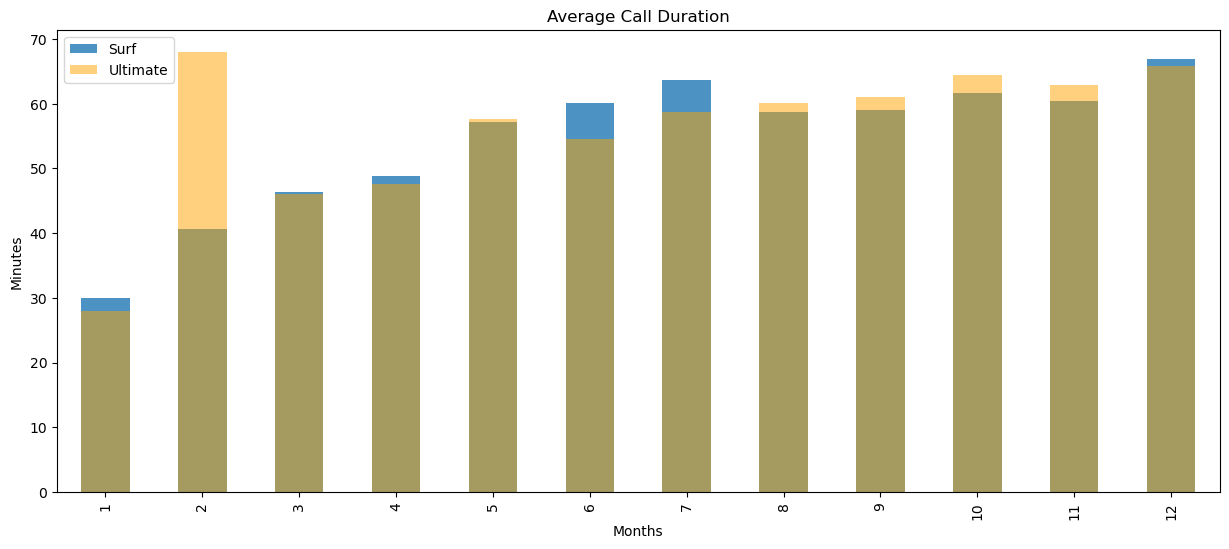

In [ ]:
# Compare the average call duration for each plan
calls_df =  merge_4.groupby(['plan', 'month'])['calls_count'].mean()
#create bar plot
plt.figure(figsize=(15, 6)) 
calls_df['surf'].plot(kind='bar',
                     alpha=0.8)
calls_df['ultimate'].plot(kind='bar',
                         color='orange',
                         alpha= 0.5)
plt.xlabel('Months')
plt.ylabel('Minutes')
plt.title('Average Call Duration')
plt.legend(["Surf", "Ultimate"])

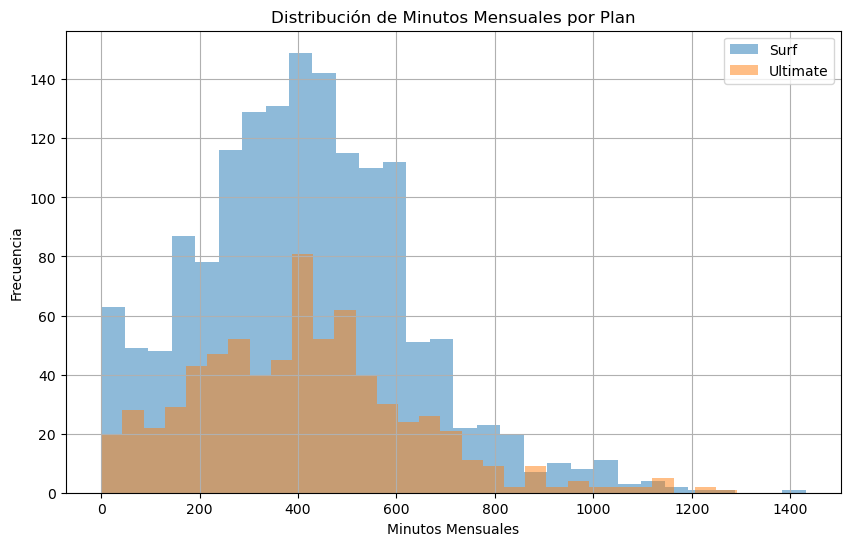

In [ ]:
# Compara number of minutes used by each plan
surf_plan = merge_4[merge_4['plan'] == "surf"]
ultimate_plan = merge_4[merge_4['plan'] == "ultimate"]
plt.figure(figsize=(10, 6))

surf_plan['minutes_sum'].plot(kind='hist',
                              bins=30,
                             alpha=0.5)
ultimate_plan['minutes_sum'].plot(kind='hist',
                                  bins=30,
                                 alpha=0.5)
plt.xlabel("Minutos Mensuales")
plt.ylabel("Frecuencia")
plt.title("Distribución de Minutos Mensuales por Plan")
plt.legend(["Surf", "Ultimate"])
plt.grid(True)
plt.show()

In [ ]:
# Calculate the average and variance of monthly call duration
media_llamadas = merge_4.groupby( 'month')['minutes_sum'].mean()
varianza_llamadas = np.var(media_llamadas)
print('The media of call duration by month is:', media_llamadas)
print('The variance of call duration is:', varianza_llamadas)

The media of call duration by month is: month
1     186.388333
2     345.779333
3     302.306571
4     327.685493
5     386.147885
6     396.740284
7     420.053520
8     395.339087
9     402.148628
10    419.041246
11    413.120099
12    451.482696
Name: minutes_sum, dtype: float64
The variance of call duration is: 4727.511398272458


<Axes: ylabel='minutes_sum'>

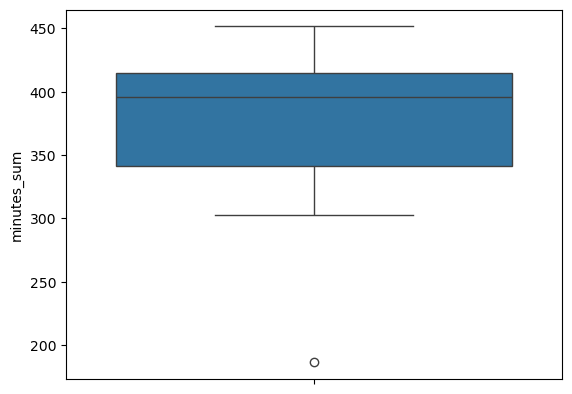

In [ ]:
#boxplot for monthly call duration
sns.boxplot(media_llamadas)



In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='plan', y='llamadas', data=merge_4, palette='Set2')
plt.title('Distribución de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Media de llamadas')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

<div class="alert alert-block alert-warning">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Atención</b> ⚠️ - Buen análisis comparativo de llamadas entre planes. Las visualizaciones son útiles, pero podrías complementar con la desviación estándar o una prueba estadística para confirmar diferencias significativas en el comportamiento. Sigue con este enfoque detallado.  
</div>

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]
La media de llamadas se encuentra en alrededor de 400 

<div class="alert alert-block alert-warning">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Atención</b> ⚠️ - Realizar conclusiones es fundamental para transformar datos en información útil. Un buen análisis no solo describe los datos, sino que extrae insights clave para la toma de decisiones. Asegúrate de interpretar los hallazgos con claridad.  
</div>

### Mensajes

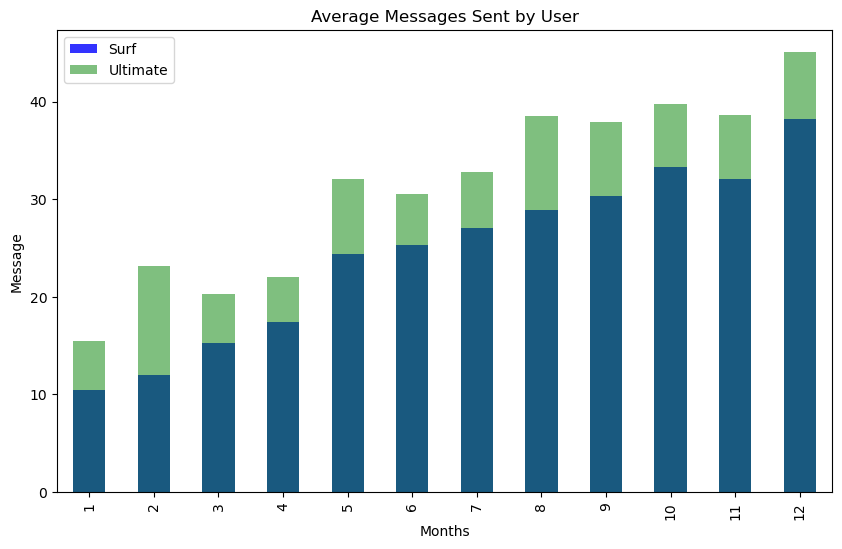

In [42]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
message_month = merge_4.groupby(['plan', 'month'])["message_sent"].mean()
message_month

plt.figure(figsize=(10, 6)) 
message_month['surf'].plot(kind='bar',
                           color='blue',
                     alpha=0.8)
message_month['ultimate'].plot(kind='bar',
                         color='green',
                         alpha= 0.5)
plt.xlabel('Months')
plt.ylabel('Message')
plt.title('Average Messages Sent by User')
plt.legend(["Surf", "Ultimate"])



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
No, el comportamiento no varia, ya que son muy similares las dos graficas

<div class="alert alert-block alert-warning">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Atención</b> ⚠️ - Buen uso de visualizaciones para comparar el envío de mensajes entre planes. Sin embargo, para confirmar que el comportamiento realmente no varía, podrías calcular medidas como la desviación estándar o aplicar una prueba estadística. Esto fortalecería la conclusión.  
</div>

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

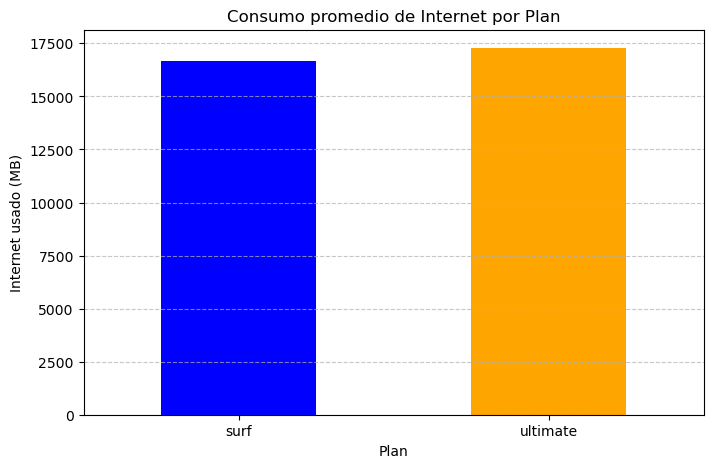

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_usage = merge_4.groupby("plan")["internet_used"].mean()
plt.figure(figsize=(8, 5))
internet_usage.plot(kind="bar", color=["blue", "orange"])
plt.title("Consumo promedio de Internet por Plan")
plt.xlabel("Plan")
plt.ylabel("Internet usado (MB)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

No, el comportamiento no varia, ya que son muy similares las dos graficas. Usuarios sin depender del plan usan casi el mismo internet

<div class="alert alert-block alert-warning">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Atención</b> ⚠️ - Buen análisis visual del consumo de Internet entre planes. Sin embargo, para respaldar la afirmación de que el comportamiento no varía, podrías calcular la desviación estándar o realizar una prueba de hipótesis. Esto daría mayor certeza a la conclusión.  
</div>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [44]:
plan_revenue = merge_5.groupby('plan')['monthly_revenue'].describe()
plan_revenue

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1545.0,59.739583,53.396963,20.0,20.0,40.33,80.0,588.6372
ultimate,713.0,72.277700,11.351942,70.0,70.0,70.00,70.0,182.0000


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
Los usuarios de surf suelen pagar mucho mas por su tarifa, en promedio 59 lo que es 39 mas de lo que esta establecido, su std es de 53 lo que significa que hay alta dispercion en los costos, lo que quiere decir que hay gran variabilidad en ellos. alrededor de el 50% de los valores, es decir de los usuarios estan en 40.33 eso quiere decir que la mitad pagan el doble de su precio establecido. El plan ultimate es mas estable, su media es casi igual a su costo, su desviacion estandar es baja de 11 lo que uqiere decir que sus costos son mas estables y consistentes, casi todos sus datos se encuentran en 70, si un usuario busca pagar algo estable esta es la mejo opcion. 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente interpretación de los ingresos por plan. Has identificado correctamente la variabilidad en los costos del plan "Surf" y la estabilidad del plan "Ultimate". Resaltar la dispersión y la diferencia entre la media y la tarifa base es un análisis clave para entender la rentabilidad de cada plan.  

Para fortalecer aún más tu conclusión, podrías visualizar la distribución de los ingresos con un boxplot o histograma. Esto ayudaría a representar de manera más clara la variabilidad que mencionaste. Sigue con este nivel de detalle en el análisis.  
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [45]:
# Prueba las hipótesis
surf_revenue = merge_5[merge_5['plan'] == 'surf']['monthly_revenue']  # Filtrar los ingresos del plan Surf
ultimate_revenue = merge_5[merge_5['plan'] == 'ultimate']['monthly_revenue']

print('Media ingresos plan Surf:', surf_revenue.mean())
print('Media ingresos plan Ultimate:', ultimate_revenue.mean())

alpha =  0.05

results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos promedio son significativamente diferentes")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que los ingresos promedio son diferentes")


Media ingresos plan Surf: 59.73958291262136
Media ingresos plan Ultimate: 72.27769985974754
Valor-p: 2.8950294906188968e-18
Rechazamos la hipótesis nula: Los ingresos promedio son significativamente diferentes


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
# Prueba las hipótesis
merge_6
ny_filter = merge_6.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
other_filter = merge_6.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

ny_revenue = ny_filter['monthly_revenue']
other_revenue = other_filter['monthly_revenue']

print('Media ingresos region NY-NJ:', ny_revenue.mean())
print('Media ingresos otras regiones:', other_revenue.mean())

alpha =  0.05

results = st.ttest_ind(ny_revenue, other_revenue, equal_var=False)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos promedio son significativamente diferentes")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que los ingresos promedio son diferentes")


Media ingresos region NY-NJ: 58.54780161725068
Media ingresos otras regiones: 64.71140498145205
Valor-p: 0.012035021702244008
Rechazamos la hipótesis nula: Los ingresos promedio son significativamente diferentes


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]
Los usuarios de ambos planes se comportan de manera casi igual, el problema esta en que gran parte de los usuarios de surf, exceden el plan ya prestablecido, haciendo que los datos sea mucho mas variables, a comparacion del ultimate donde muy pocos usuarios se exceden del limite del plan prestablecido. Haciendo que los datos se ven mucho mas estables, si contratas el plan surf es casi por seguro que no vas a pagar los 20, terminaras pagando hasta el doble, pero bueno no llega a costarte 70, aunque ya si pagas 70 probablemnte siempre pagues 70 y no varie tanto como el plan surf

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación de pruebas de hipótesis. Has seleccionado correctamente la prueba t de dos muestras y establecido un umbral de significancia adecuado. Además, interpretaste bien los resultados, resaltando la diferencia en la variabilidad de costos entre los planes y su impacto en la estabilidad de los ingresos.  


</div>

# Comentario general del revisor 

 
<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades Rodrigo! Tu proyecto está **aprobado** Has realizado un análisis sólido y bien estructurado. Has aplicado correctamente técnicas de limpieza, transformación y análisis de datos, complementadas con pruebas estadísticas bien fundamentadas. A continuación, destaco los puntos positivos y algunas áreas para seguir explorando:  

**Puntos Positivos:**  
- **Limpieza y preparación de datos:** Correcta conversión de tipos, manejo de valores nulos y consolidación de información.  
- **Exploración y visualización:** Uso adecuado de gráficos para comparar el comportamiento de usuarios en llamadas, mensajes e internet.  
- **Análisis de ingresos y variabilidad:** Identificaste diferencias clave en el comportamiento financiero de los planes.  
- **Pruebas de hipótesis bien estructuradas:** Aplicaste pruebas estadísticas relevantes para confirmar diferencias en los ingresos.  

**Áreas para Seguir Investigando:**  
- **Visualización avanzada:** Incorporar boxplots o histogramas para mostrar la variabilidad en ingresos y consumo de servicios.  
- **Segmentación de usuarios:** Explorar grupos con patrones de consumo similares para mejorar la rentabilidad de los planes.  
- **Optimización de planes:** Evaluar si los límites de consumo establecidos en cada plan pueden ajustarse para maximizar ingresos y retención de clientes.  
- **Pruebas estadísticas adicionales:** Considerar pruebas de normalidad o análisis de varianza (ANOVA) para respaldar más conclusiones.  

Tu trabajo demuestra un buen manejo del análisis de datos y una estructura clara en la interpretación de resultados. ¡Sigue con este nivel de detalle y enfoque analítico!  
</div>  
